<h1 align=center> MilliQan Uproot Tutorial</h1>

This jupyter notebook was developed for the 6th MilliQan conference as a tutorial for using the MilliQan data and analysis framework. The framework has been built using the uproot package. Uproot allows root files to be read in as either awkward arrays, numpy arrays, or pandas dataframes. This facilitates faster columnar analysis on the data.

For more information on uproot see the documentation and a tutorials given by J Pivarski and Mason Proffitt below.

[1] https://uproot.readthedocs.io/en/latest/ <br>
[2] https://github.com/jpivarski-talks/2021-06-14-uproot-awkward-columnar-hats/blob/main/2-uproot.ipynb <br>
[3] https://masonproffitt.github.io/uproot-tutorial/aio/index.html

For more information on awkward arrays see the awkward array documentation and tutorial by J Pivarski below.

[1] https://awkward-array.org/doc/main/user-guide/index.html <br>
[2] https://github.com/jpivarski-talks/2021-06-14-uproot-awkward-columnar-hats/blob/main/3-awkward-array.ipynb


## Useful Documents

### Channel Mapping
<img src="https://github.com/carriganm95/milliqanOffline/blob/tutorial/Run3Detector/analysis/tutorial/channelMapping.png?raw=1" alt="Alternative text" />

### Offline Branches: 
https://docs.google.com/document/d/1W-IhqTyuc8L9usIJ3deU526K9qoin0g4_5Q0Zc0dv5Q/edit 

## Importing Packages

The first step will be to import all packages we need. The root and uproot packages are both necessary for our purposes. These need to be installed into this workspace.

To load our files with uproot we also need at least one of awkward, numpy, or pandas. We can easily switch between these different formats and use different packages for different tasks.

We will also import the hist and matplotlib.pyplot packages to make histograms.

Finally we will use the array package to allow us to fill root histograms.

In [1]:
import sys

import ROOT as r
import uproot

import hist
import matplotlib.pyplot as plt

import awkward as ak
import numpy as np
import pandas as pd

import array as arr

In [2]:
#note if your version of awkward is <2 you should install a newer version

print(ak.__version__)

#also upgrade uproot if below version 5

print(uproot.__version__)

#run below only if needed

2.7.1
5.5.1


In [3]:
pip install --user awkward==2.7.1


DEPRECATION: gosam 2.1.1-4b98559 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gosam or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --user uproot==5.5.1

DEPRECATION: gosam 2.1.1-4b98559 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gosam or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install awkward_pandas

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: gosam 2.1.1-4b98559 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gosam or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


## Opening File with Uproot

We will use a signal skim from eos as an example. Then we can open our root file and load in the correct tree the same way we do with traditional root.

In [6]:
upfile = uproot.open("/eos/experiment/milliqan/skims/signal/MilliQan_Run1500_v35_signal_beamOff_tight.root") #load the root file
uptree = upfile["t"] #open the tree "t"
uptree.show() #print out all branches

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
event                | int32_t                  | AsDtype('>i4')
runNumber            | int64_t                  | AsDtype('>i8')
fileNumber           | int64_t                  | AsDtype('>i8')
boardsMatched        | bool                     | AsDtype('bool')
DAQEventNumber       | int32_t                  | AsDtype('>i4')
daqFileOpen          | uint64_t                 | AsDtype('>u8')
daqFileClose         | uint64_t                 | AsDtype('>u8')
maxPulseIndex        | int32_t                  | AsDtype('>i4')
nConsecSamples       | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
nConsecSamplesEnd    | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
highThreshold        | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
lowThreshold         | std::vector<float>       | AsJagged(AsDtype('>f4'),

Note that in the above print out showing our root file there is also a list of types. There are some types that are vectors and others that are not. For most python dataframes this would cause an issue (numpy, pandas), however the awkward array package was designed to solve this issue. In the same event we can have arrays of different sizes saved.

In [7]:
#Optionally we can load in the tree at the same time we load the file by appending ":\<treename>\" to the end of the file

uptree = uproot.open("/eos/experiment/milliqan/skims/signal/MilliQan_Run1500_v35_signal_beamOff_tight.root:t")

There are some other useful functions for looking at the contents of our tree.

In [8]:
uptree.keys() #print the branches

['event',
 'runNumber',
 'fileNumber',
 'boardsMatched',
 'DAQEventNumber',
 'daqFileOpen',
 'daqFileClose',
 'maxPulseIndex',
 'nConsecSamples',
 'nConsecSamplesEnd',
 'highThreshold',
 'lowThreshold',
 'totalFillLumi',
 'fillId',
 'beamType',
 'beamEnergy',
 'betaStar',
 'beamOn',
 'fillStart',
 'fillEnd',
 'beamInFill',
 'goodRunLoose',
 'goodRunMedium',
 'goodRunTight',
 'goodSingleTrigger',
 'triggerThreshold',
 'triggerEnable',
 'triggerMajority',
 'triggerPolarity',
 'triggerLogic',
 'dynamicPedestal',
 'sidebandMean',
 'sidebandRMS',
 'sidebandMeanRaw',
 'sidebandRMSRaw',
 'maxThreeConsec',
 'chan',
 'chanWithinBoard',
 'row',
 'column',
 'layer',
 'type',
 'board',
 'height',
 'area',
 'pickupFlag',
 'pickupFlagTight',
 'nPE',
 'riseSamples',
 'fallSamples',
 'ipulse',
 'npulses',
 'pulseIndex',
 'time',
 'timeFit',
 'time_module_calibrated',
 'timeFit_module_calibrated',
 'duration',
 'delay',
 'max',
 'iMaxPulseLayer',
 'maxPulseTime',
 'present',
 'event_trigger_time_tag',


In [9]:
uptree.typenames() #print branches and type

{'event': 'int32_t',
 'runNumber': 'int64_t',
 'fileNumber': 'int64_t',
 'boardsMatched': 'bool',
 'DAQEventNumber': 'int32_t',
 'daqFileOpen': 'uint64_t',
 'daqFileClose': 'uint64_t',
 'maxPulseIndex': 'int32_t',
 'nConsecSamples': 'std::vector<int32_t>',
 'nConsecSamplesEnd': 'std::vector<int32_t>',
 'highThreshold': 'std::vector<float>',
 'lowThreshold': 'std::vector<float>',
 'totalFillLumi': 'float',
 'fillId': 'int32_t',
 'beamType': 'TString',
 'beamEnergy': 'float',
 'betaStar': 'float',
 'beamOn': 'bool',
 'fillStart': 'uint64_t',
 'fillEnd': 'uint64_t',
 'beamInFill': 'bool',
 'goodRunLoose': 'bool',
 'goodRunMedium': 'bool',
 'goodRunTight': 'bool',
 'goodSingleTrigger': 'bool',
 'triggerThreshold': 'std::vector<float>',
 'triggerEnable': 'std::vector<bool>',
 'triggerMajority': 'std::vector<int32_t>',
 'triggerPolarity': 'std::vector<int32_t>',
 'triggerLogic': 'std::vector<int32_t>',
 'dynamicPedestal': 'std::vector<float>',
 'sidebandMean': 'std::vector<float>',
 'sideban

### Selecting Branches

We can also select specific branches by using the arrays method of uproot. Note that in the below example we can also create a cut, set the library to use, and determine how many events to load.

library = data format to load branches into. Options are awkward (ak, default), pandas (pd), and numpy (np). <br>
cut = string making a cut on the data, cut is applied at this time <br>
entry_stop = sets the number of events to load <br>

In [10]:
#using numpy

branches = uptree.arrays(["height", "area"], library="np", entry_stop=1) #note that making a cut here cannot be done
branches #print numpy array

{'height': array([array([  23.968452,   48.863426, 1069.5161  ,   30.6137  ,   34.885597,
                 49.148922,   21.669907], dtype=float32)                       ],
       dtype=object),
 'area': array([array([  1621.747 ,   4081.4614, 144842.5   ,   1850.054 ,   2054.421 ,
                 3237.3628,    583.0208], dtype=float32)                       ],
       dtype=object)}

In [11]:
#using pandas

branches = uptree.arrays(["height", "area"], library="pd", entry_stop=10) #note that making a cut here cannot be done
branches #print pandas dataframe

,height,area
0,"[23.96845245361328, 48.863426208496094, 1069.5...","[1621.7469482421875, 4081.46142578125, 144842...."
1,"[76.24039459228516, 20.65447425842285, 19.5505...","[8328.525390625, 1179.5438232421875, 1154.4130..."
2,"[463.6202392578125, 30.208181381225586, 51.137...","[45628.84765625, 2031.7901611328125, 3906.8823..."
3,"[1249.9248046875, 10.905760765075684, 48.07368...","[177122.296875, 185.31494140625, 2633.66186523..."
4,"[1127.27587890625, 151.6586456298828, 48.64171...","[127740.2578125, 12292.02734375, 3609.16528320..."
5,"[334.06317138671875, 735.7642822265625, 52.979...","[30031.09375, 76126.125, 6820.1923828125, 2122..."
6,"[23.055021286010742, 1249.220458984375, 48.213...","[1593.1502685546875, 139261.15625, 3263.903076..."
7,"[1018.8947143554688, 105.3125228881836, 64.901...","[140506.453125, 17841.8046875, 2364.0439453125..."
8,"[24.50779914855957, 178.9404296875, 36.9095916...","[1558.6829833984375, 16943.244140625, 381.2640..."
9,"[62.98199462890625, 240.53500366210938, 512.93...","[5207.96923828125, 21600.884765625, 50455.8320..."


In [12]:
#using awkward

branches = uptree.arrays(["height", "area"], cut="height >= 500", entry_stop=100000)
branches[:10] #print first 10 events

<Array [{height: [1.07e+03], ...}, ..., {...}] type='10 * {height: var * fl...'>

We can also make more cuts by defining a cut and then applying it to our branches. The cut will be arrays of booleans for each pulse that we can then apply to our data to "make the cut".

In [13]:
area_cut = branches['area'] >= 500 #cut requires area >= 500 pulse by pulse
height_cut = branches['height'] >= 700 #cut requires height >= 700 pulse by pulse
area_cut #print the area cut

<Array [[True], [True, True, ..., True], ..., [], []] type='32880 * var * bool'>

In [14]:
branches_cut = branches[area_cut] #here we make the cut by saving only those pulses that have a True value for the cut
branches_cut #print

<Array [{height: [1.07e+03], ...}, ..., {...}] type='32880 * {height: var *...'>

We can make a quick plot of this data by using the hist package. First we need to define our histogram (bins, start, stop) the same as in root. Then we need to fill the histogram with a flattened awkward array.

In [15]:
h1 = hist.Hist.new.Reg(1000, 0, 200000, name="Area").Double()
h1.fill(ak.flatten(branches_cut['area']))

Hist(Regular(1000, 0, 200000, name='Area'), storage=Double()) # Sum: 48759.0 (58829.0 with flow)

In [16]:
branches_cut = branches[area_cut & height_cut] #here we apply both the area and height cuts with & (can also use either with |, and not with ~)
branches_cut #print

<Array [{height: [1.07e+03], ...}, ..., {...}] type='32880 * {height: var *...'>

In [17]:
h1 = hist.Hist.new.Reg(1000, 0, 200000, name="Area").Double()
h1.fill(ak.flatten(branches_cut['area']))

Hist(Regular(1000, 0, 200000, name='Area'), storage=Double()) # Sum: 38539.0 (48609.0 with flow)

## Plotting

### Hist Package

The hist package is designed to quickly make plots in jupyter notebooks.

In [18]:
#Define a histogram
h1 = hist.Hist.new.Reg(130, 0, 1300, name="Height").Double()
h1.fill(ak.flatten(branches['height']))

Hist(Regular(130, 0, 1300, name='Height'), storage=Double()) # Sum: 58815.0 (58829.0 with flow)

### MatPlotlib

We can also use matplotlib plots to take advantage of python tools for plotting.

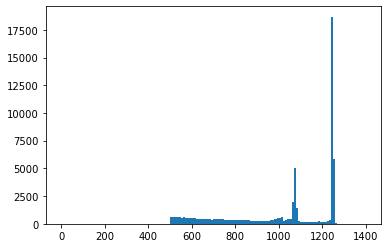

In [19]:
plt.hist(ak.flatten(branches['height']), bins=140, range=(0, 1400))
plt.show()

### Root Histograms

Finally we can still use root histograms by converting our entries to array objects. This method of plotting is a bit slow but allows us to use the traditional root tools and save our histograms to root files.

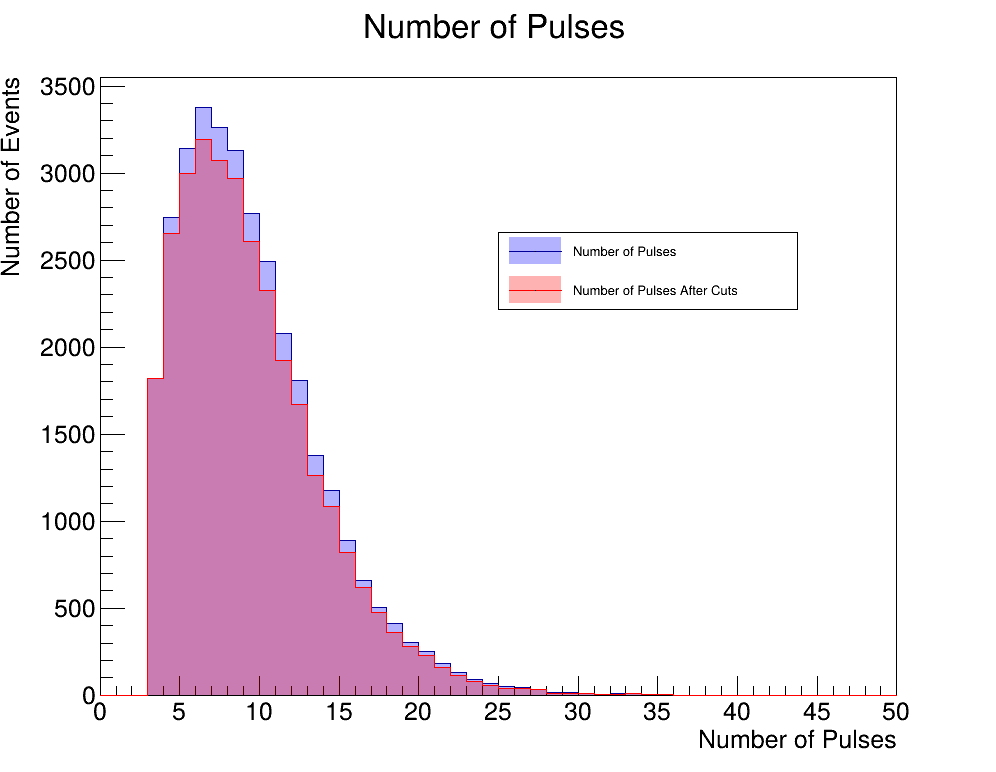

In [20]:
#define root histogram
h_height = r.TH1F("h_height", "Height", 140, 0, 1400)

#create array from awkward array
heights = arr.array('d', ak.flatten(branches['height']))

#fill the histogram
#inputs are number of entries, values, and weights
h_height.FillN(len(heights), heights, np.ones(len(heights)))

#create a TCanvas to draw on
c1 = r.TCanvas("c1", "c1", 500, 400)

c1.cd()
h_height.Draw()
c1.Draw()

## Iterating Over Multiple Files

The equivalent of TChains is running with uproot iterate. This is what most of the analysis framework is based on.

In [22]:
#define total events
totalEvents = 0 #count total events
passingEvents = 0 #count events passing cuts

#define histograms
h_npulses = r.TH1F("h_npulses", "Number of Pulses", 50, 0, 50)
h_npulsesCut = r.TH1F("h_npulsesCut", "Number of Pulses After Cuts", 50, 0, 50)

#define TCanvas for plotting
c = r.TCanvas("c1", "c1", 1000, 800)

#use the uproot iterate method to loop over all files in our filelist
#https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.iterate.html
for events in uproot.iterate(

        #list of files to run over
        ["/eos/experiment/milliqan/skims/signal/MilliQan_Run1500_v35_signal_beamOff_tight.root"],

        #branches defined above
        ["area", "height", "npulses", "chan", "type"],

        #if we want to make a cut we can define it here
        #note cannot do this with jagged array (ex event and pulse level quantities)
        cut="height>=0",

        #library used to load data
        #default is awkward array (ak), can also use pandas (pd) or numpy (np)
        library = 'ak',

        #number of events or size per batch
        step_size=1000,

        #number of processors
        num_workers=8

    ):

        totalEvents += len(events)

        #next we can make some cuts on the data
        #ex veto events with hits in top panels
        panel_cut1 = ak.any(events[:, 'chan'] == 74, axis=1) #check if any pulse in event is channel 74 (front panel), axis=1 to check for any in event
        panel_cut2 = ak.any(events[:, 'chan'] == 75, axis=1) #back panel

        passing = events[~panel_cut1 & ~panel_cut2]
        passingEvents += len(passing)

        npulses_pre = ak.count(events['npulses'], axis=1) #count number of pulses in events, note cannot use npulses because some events have empty arrays due to cuts
        npulses_post = ak.count(passing['npulses'], axis=1) #count number of pulses after panel cut

        #turn awkward arrays into arrays
        npulses_pre = arr.array('d', npulses_pre.to_list())
        npulses_post = arr.array('d', npulses_post.to_list())

        #fill histograms
        if len(npulses_pre) > 0: h_npulses.FillN(len(npulses_pre), npulses_pre, np.ones(len(npulses_pre)))
        if len(npulses_post) > 0: h_npulsesCut.FillN(len(npulses_post), npulses_post, np.ones(len(npulses_post)))

print("{0} events passing cuts out of {1} total".format(passingEvents, totalEvents))




30946 events passing cuts out of 32880 total


Warning in <TROOT::Append>: Replacing existing TH1: h_npulses (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_npulsesCut (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Make plot showing the number of pulses before and after cutting on top pannels.

In [23]:
c.cd()

r.gStyle.SetOptStat(0000) #remove stats box

h_npulses.GetYaxis().SetTitle("Number of Events")
h_npulses.GetXaxis().SetTitle("Number of Pulses")
h_npulses.SetFillColorAlpha(4, 0.3)
h_npulses.Draw()
h_npulsesCut.SetLineColor(2)
h_npulsesCut.SetFillColorAlpha(2, 0.3)
h_npulsesCut.Draw("same")

l1 = r.TLegend(0.5, 0.6, 0.8, 0.7)
l1.AddEntry(h_npulses)
l1.AddEntry(h_npulsesCut)
l1.Draw()

c.Draw()

## MilliQan Processor

To simplify the offline analysis we have designed some tools to work with our data and the uproot packages. The purpose is to centralize the code we use so that we can develop and use the same tools.

We will need to load in the necessary packages from the analysis/utilities/ directory in order to take full advantage of the milliqan analysis framework. The tools we will use are 

milliqanProcessor: Essentially a wrapper for uproot iterate method. Runs over the given files list and applies all cuts, makes plots, and runs custom functions.

milliqanScheduler: Creates schedule of cuts and plots to apply in the processor.

milliqanCuts: Class defining generic cuts, centralize how we define our cuts. 

milliqanPlotter: Class for defining plots.

In [24]:
import os
import sys
sys.path.append(os.getcwd() + '/../utilities/')
from milliqanProcessor import *
from milliqanScheduler import *
from milliqanCuts import *
from milliqanPlotter import *
from utilities import *

import ROOT as r
import uproot
import hist
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np
import pandas as pd
import array as arr
%jsroot on

%load_ext autoreload
%autoreload 2

Similar to in uproot iterate we need to define a filelist that we want to run over and define the branches that we require to do our analysis.

In [26]:
#define a file list to run over
filelist = ['/eos/experiment/milliqan/skims/signal/MilliQan_Run1500_v35_signal_beamOff_tight.root']

#define the necessary branches to run over
branches = ['event', 'tTrigger', 'boardsMatched', 'pickupFlag', 'fileNumber', 'runNumber', 'type', 'ipulse', 'nPE', 'chan',
                'time_module_calibrated', 'timeFit_module_calibrated', 'row', 'column', 'layer', 'height', 'area', 'npulses', 'sidebandRMS']

We can also get the total luminosity/run time of a file. For skims this is saves as TNamed objects in the root files while for normal offline files this is read throught the mqLumis.json file. There are functions for each case with examples below.

In [27]:
#get the luminosity and run time

lumi, runTime = getSkimLumis(filelist)

#note that for offline files the function getLumiofFileList(filelist) will return the same info


Total luminosity 0.0 and run time 1982408.0s


Next we want to define our cuts object and add all of the cuts we want to make for our analysis. 

The cuts can either come directly from the milliqanCuts class or they can be modifications of those functions using the "getCut" method. This method creates a lambda function of the existing cuts but allows us to change variables in the existing functions.

Inputs for getCut are: <br>

1. original cut function <br>
2. name for the new branch <br>
3. cut value(s) <br>
    

In [28]:
#define the milliqan cuts object
mycuts = milliqanCuts()

#example of changing cut value
heightCut200 = getCutMod(mycuts.heightCut, mycuts, 'heightCut200', heightCut=500, cut=True)

#example of cutting on events
fourLayerCut = getCutMod(mycuts.oneHitPerLayerCut, mycuts, 'fourLayerCut', cut=True, multipleHits=True)


Now we can define the plots to make.

First we define the milliqanPlotter object that will be passed to the milliqanProcessor.

Next we need to define the root histograms that we want to be created.

Finally we need to add the histogram to our plotter using the addHistograms function. This functions takes as inputs <br>

1. the root histogram <br>
2. the branch to be plotted <br>
3. any cuts to be applied before plotting (optional) <br>

In [29]:
#define milliqan plotter
myplotter = milliqanPlotter()

#create root histogram 
h_height = r.TH1F("h_height", "Height", 140, 0, 1400)

#add root histogram to plotter
myplotter.addHistograms(h_height, 'height')

Warning in <TROOT::Append>: Replacing existing TH1: h_height (Potential memory leak).


We can now define the order that we would like to create our cuts and plots. We do this by defining a list of both cuts and plots. 

Then we can create a milliQanScheduler object and pass our cutflow to the scheduler.

If we want to inspect our schedule we can also print it out.

In [30]:
#defining the cutflow
cutflow = [mycuts.totalEventCounter, mycuts.fullEventCounter, fourLayerCut, heightCut200, myplotter.dict['h_height']]

#create a schedule of the cuts
myschedule = milliQanScheduler(cutflow, mycuts, myplotter)

#print out the schedule
myschedule.printSchedule()

----------------------------
MilliQan Scheduler:
	0. totalEventCounter
	1. fullEventCounter
	2. fourLayerCut
	3. heightCut200
	4. h_height
----------------------------


Finally we can define our milliqanProcessor object!

 We need to pass this object:
 1. List of files to run over
 2. List of necessary input branches from root files
 3. The schedule we created
 4. The cut object we created
 5. The plotter object we created
 
 Optionally we can also pass: <br>
 1. max events to run over

In [31]:
#create the milliqan processor object
myiterator = milliqanProcessor(filelist, branches, myschedule, step_size=1000, qualityLevel='override', max_events=10000)



Chosen quality level:  override 
Chosen verbosity level:  minimal 


Quality check is being overridden. All files will be processed.


In [32]:
for key, value in myplotter.dict.items():
    if value not in cutflow:
        cutflow.append(value)

The last step is to run the processor!

In [33]:
#run the milliqan processor
myiterator.run()

#we can also print out the cutflow
mycuts.getCutflowCounts()

MilliQan Processor: Processing event 0...
MilliQan Processor: Processing event 1000...
MilliQan Processor: Processing event 2000...
MilliQan Processor: Processing event 3000...
MilliQan Processor: Processing event 4000...
MilliQan Processor: Processing event 5000...
MilliQan Processor: Processing event 6000...
MilliQan Processor: Processing event 7000...
MilliQan Processor: Processing event 8000...
MilliQan Processor: Processing event 9000...
Number of processed events 10000
----------------------------------Cutflow Table----------------------------------------------------------------------------------
Cut                       N Passing Events     Cum Event Eff % (Prev)    N Passing Pulses     Cum Pulse Eff % (Prev)    Cut Applied                   
---------------------------------------------------------------------------------------------------------------------------------
totalEventCounter         9000                 100.0 (100.0)             82141                100.0 (100.0)  

We can now plot the histograms that we created

In [34]:
c1 = r.TCanvas("c1", "c1", 400, 400)
h_height.Draw()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


## Example Analysis: Finding Beam Muons

As an example analysis we will try to look for beam muons by comparing one run with beam on vs another with beam off. Some initial criteria we need to consider for this is

### Event and Pulse Cuts:
1. Boards Matched: Require that all digitizer boards are matched in the event
2. Pickup Flag: Only use pulses passing the pickup flag cut

### Branches 
1. 4 layers hit: we want there to be hits in all four layers of the detector
2. Straight pulse path: we want to have pulses in a straight line path through the detector
3. Channel pulse selection: there can be multiple pulses in a given channel. We need to decide which to use
4. Bar hits: require all hits that we look at are in bars

We also want to define a new cut function to create a branch for the things we want to plot. Here we want to recreate the plot made in the run 2 milliQan analysis looking at cosmic vs beam muon times between layers 1 and 3 (see below). Therefore we will create a function that calculates the times between pulses in different layers.

<img src="https://github.com/carriganm95/milliqanOffline/blob/updateProcessor/Run3Detector/analysis/tutorial/milliqan_beam_muon_Run2.png?raw=true" alt="Alternative text" />

In [35]:
#define function to get the time difference between pulses in layer1 and layer3
@mqCut
def timeDiff(self, cutName='timeDiff', branches=None):

    times0 = self.events['timeFit_module_calibrated'][(self.events['layer']==0) & (self.events['type']==0)]
    times3 = self.events['timeFit_module_calibrated'][(self.events['layer']==3) & (self.events['type']==0)]

    combos = ak.cartesian([times0, times3], axis=1)

    diff = combos['1'] - combos['0']

    self.events[cutName] = diff

### Creating our processor:

Now we want to run on our beam on file: Run 1031

We will select the branches that we need for this analysis and develop the cuts

In [40]:
#define a file list to run over
filelist = ['/eos/experiment/milliqan/skims/beam/MilliQan_Run1500_v35_beam_beamOn_tight.root']

#define the necessary branches to run over
branches = ['event', 'tTrigger', 'boardsMatched', 'pickupFlag', 'fileNumber', 'runNumber', 'type', 'ipulse', 'nPE', 'chan',
                'time_module_calibrated', 'timeFit_module_calibrated', 'row', 'column', 'layer', 'height', 'area', 'npulses', 'sidebandRMS']

#define the milliqan cuts object
mycuts = milliqanCuts()

#require pulses are not pickup
pickupCut = getCutMod(mycuts.pickupCut, mycuts, 'pickupCut', cut=True)

#require that all digitizer boards are matched
boardMatchCut = getCutMod(mycuts.boardsMatched, mycuts, 'boardMatchCut', cut=True)

#Add four layer cut
fourLayerCut = getCutMod(mycuts.oneHitPerLayerCut, mycuts, 'fourLayerCut', cut=True, multipleHits=True)

#add first pulse cut
firstPulseCut = getCutMod(mycuts.firstPulseCut, mycuts, 'firstPulseCut', cut=True)

#bar cut
barCut = getCutMod(mycuts.barCut, mycuts, 'barCut', cut=True)

#nPE cut
nPECut = getCutMod(mycuts.nPECut, mycuts, 'nPECut', nPECut=20, cut=True)

#require pulses occured in trigger window
centralTimeCut = getCutMod(mycuts.centralTime, mycuts, 'centralTimeCut', cut=True)

#straight line cut
straightLineCut = getCutMod(mycuts.straightLineCut, mycuts, 'straightLineCut', cut=True, limitPaths=True)

#require no panels hit with nPE>nPECut (note panels have no nPE calibration, should actually be area cut)
panelVeto = getCutMod(mycuts.panelVeto, mycuts, 'panelVeto', cut=True, nPECut=100e3)

#Add our custom function
setattr(milliqanCuts, 'timeDiff', timeDiff)

#define milliqan plotter
myplotter = milliqanPlotter()

#create root histogram 
h_timeDiff_beamOn = r.TH1F("h_timeDiff_beamOn", "Time Diff", 80, -80, 80)

#add root histogram to plotter
myplotter.addHistograms(h_timeDiff_beamOn, 'timeDiff')

#defining the cutflow
cutflow = [mycuts.totalEventCounter, mycuts.fullEventCounter, boardMatchCut, pickupCut, centralTimeCut, nPECut, panelVeto,
           fourLayerCut, barCut, firstPulseCut, straightLineCut, mycuts.timeDiff, myplotter.dict['h_timeDiff_beamOn']]

#create a schedule of the cuts
myschedule = milliQanScheduler(cutflow, mycuts, myplotter)

#print out the schedule
myschedule.printSchedule()

#create the milliqan processor object
myiterator = milliqanProcessor(filelist, branches, myschedule, mycuts, myplotter, qualityLevel='override', goodRunsList=None)

#run the milliqan processor
myiterator.run()

mycuts.getCutflowCounts()

----------------------------
MilliQan Scheduler:
	0. totalEventCounter
	1. fullEventCounter
	2. boardMatchCut
	3. pickupCut
	4. centralTimeCut
	5. nPECut
	6. panelVeto
	7. fourLayerCut
	8. barCut
	9. firstPulseCut
	10. straightLineCut
	11. timeDiff
	12. h_timeDiff_beamOn
----------------------------

Chosen quality level:  override 
Chosen verbosity level:  minimal 


Quality check is being overridden. All files will be processed.
MilliQan Processor: Processing event 0...
MilliQan Processor: Processing event 10000...
Number of processed events 11800
----------------------------------Cutflow Table----------------------------------------------------------------------------------
Cut                       N Passing Events     Cum Event Eff % (Prev)    N Passing Pulses     Cum Pulse Eff % (Prev)    Cut Applied                   
---------------------------------------------------------------------------------------------------------------------------------
totalEventCounter         11800  

Warning in <TROOT::Append>: Replacing existing TH1: h_timeDiff_beamOn (Potential memory leak).


In [41]:
#check out output histogram

c1 = r.TCanvas("c1", "c1", 400, 400)
c1.cd()
h_timeDiff_beamOn.Draw()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Note that we can also save all of our plots to a root output file

In [39]:
ls /eos/experiment/milliqan/skims/beam/

MilliQan_Run1400_v35_beam_beamOn_tight.root
MilliQan_Run1500_v35_beam_beamOn_tight.root
MilliQan_Run1600_v35_beam_beamOn_tight.root
MilliQan_Run1700_v35_beam_beamOn_tight.root
MilliQan_Run1800_v35_beam_beamOn_tight.root
MilliQan_Run1900_v35_beam_beamOn_tight.root


In [42]:
outputFile = 'MilliQan_beamMuon_test.root'
myplotter.saveHistograms(outputFile)


Now we will repeat the same process but with the beam off file: Run 1035

In [43]:
ls /eos/experiment/milliqan/skims/cosmic

MilliQan_Run1300_v35_cosmic_beamOff_tight.root
MilliQan_Run1400_v35_cosmic_beamOff_tight.root
MilliQan_Run1500_v35_cosmic_beamOff_tight.root
MilliQan_Run1600_v35_cosmic_beamOff_tight.root
MilliQan_Run1700_v35_cosmic_beamOff_tight.root
MilliQan_Run1800_v35_cosmic_beamOff_tight.root
MilliQan_Run1900_v35_cosmic_beamOff_tight.root


In [44]:
#define a file list to run over
filelist = ['/eos/experiment/milliqan/skims/cosmic/MilliQan_Run1500_v35_cosmic_beamOff_tight.root']

#define the necessary branches to run over
branches = ['event', 'tTrigger', 'boardsMatched', 'pickupFlag', 'fileNumber', 'runNumber', 'type', 'ipulse', 'nPE', 'chan',
                'time_module_calibrated', 'timeFit_module_calibrated', 'row', 'column', 'layer', 'height', 'area', 'npulses', 'sidebandRMS']

#define the milliqan cuts object
mycuts = milliqanCuts()

#require pulses are not pickup
pickupCut = getCutMod(mycuts.pickupCut, mycuts, 'pickupCut', cut=True)

#require that all digitizer boards are matched
boardMatchCut = getCutMod(mycuts.boardsMatched, mycuts, 'boardMatchCut', cut=True)

#Add four layer cut
fourLayerCut = getCutMod(mycuts.oneHitPerLayerCut, mycuts, 'fourLayerCut', cut=True, multipleHits=True)

#add first pulse cut
firstPulseCut = getCutMod(mycuts.firstPulseCut, mycuts, 'firstPulseCut', cut=True)

#bar cut
barCut = getCutMod(mycuts.barCut, mycuts, 'barCut', cut=True)

#nPE cut
nPECut = getCutMod(mycuts.nPECut, mycuts, 'nPECut', nPECut=50, cut=True)

#require pulses occured in trigger window
centralTimeCut = getCutMod(mycuts.centralTime, mycuts, 'centralTimeCut', cut=True)

#straight line cut
straightLineCut = getCutMod(mycuts.straightLineCut, mycuts, 'straightLineCut', cut=True, limitPaths=True)

#Add our custom function
setattr(milliqanCuts, 'timeDiff', timeDiff)

#define milliqan plotter
myplotter = milliqanPlotter()

#create root histogram 
h_timeDiff_beamOff = r.TH1F("h_timeDiff_beamOff", "Time Diff", 80, -80, 80)

#add root histogram to plotter
myplotter.addHistograms(h_timeDiff_beamOff, 'timeDiff')

#defining the cutflow
cutflow = [mycuts.totalEventCounter, mycuts.fullEventCounter, boardMatchCut, pickupCut, centralTimeCut, nPECut, mycuts.layerCut, 
           fourLayerCut, barCut, firstPulseCut, straightLineCut, mycuts.timeDiff, myplotter.dict['h_timeDiff_beamOff']]

#create a schedule of the cuts
myschedule = milliQanScheduler(cutflow, mycuts, myplotter)

#print out the schedule
myschedule.printSchedule()

#create the milliqan processor object
myiterator = milliqanProcessor(filelist, branches, myschedule, mycuts, myplotter, qualityLevel='override', goodRunsList=None)

#run the milliqan processor
myiterator.run()

mycuts.getCutflowCounts()

----------------------------
MilliQan Scheduler:
	0. totalEventCounter
	1. fullEventCounter
	2. boardMatchCut
	3. pickupCut
	4. centralTimeCut
	5. nPECut
	6. layerCut
	7. fourLayerCut
	8. barCut
	9. firstPulseCut
	10. straightLineCut
	11. timeDiff
	12. h_timeDiff_beamOff
----------------------------

Chosen quality level:  override 
Chosen verbosity level:  minimal 


Quality check is being overridden. All files will be processed.
MilliQan Processor: Processing event 0...
MilliQan Processor: Processing event 10000...
MilliQan Processor: Processing event 20000...
MilliQan Processor: Processing event 30000...
MilliQan Processor: Processing event 40000...
Number of processed events 45081
----------------------------------Cutflow Table----------------------------------------------------------------------------------
Cut                       N Passing Events     Cum Event Eff % (Prev)    N Passing Pulses     Cum Pulse Eff % (Prev)    Cut Applied                   
-------------------------

In [45]:

h1_scaled = h_timeDiff_beamOn.Clone()
scale1 = h1_scaled.Integral(20, 60)
if scale1>0: h1_scaled.Scale(1/scale1)

h_timeDiff_beamOff.SetLineColor(2)
h2_scaled = h_timeDiff_beamOff.Clone()
scale2 = h2_scaled.Integral(20, 60)
if scale2>0: h2_scaled.Scale(1/scale2)

h1_scaled.Draw("hist")
h2_scaled.Draw("hist sames")

c1.Draw()

print("Beam On: \n\tEntries: {0}\n\tMean: {1} +/- {2}\n\tstd: {3}".format(h_timeDiff_beamOn.GetEntries(), h_timeDiff_beamOn.GetMean(), h_timeDiff_beamOn.GetMeanError(), h_timeDiff_beamOn.GetStdDev()))
print("Beam Off: \n\tEntries: {0}\n\tMean: {1} +/- {2}\n\tstd: {3}".format(h_timeDiff_beamOff.GetEntries(), h_timeDiff_beamOff.GetMean(), h_timeDiff_beamOff.GetMeanError(), h_timeDiff_beamOff.GetStdDev()))

Beam On: 
	Entries: 26.0
	Mean: -1.4288001427283654 +/- 2.3110608830958284
	std: 11.7841445400066
Beam Off: 
	Entries: 427.0
	Mean: -11.199772211651053 +/- 0.5807967618352843
	std: 12.001571694757994
